In [135]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import(classification_report, r2_score, confusion_matrix, ConfusionMatrixDisplay,
                            accuracy_score, f1_score, roc_auc_score, precision_score, recall_score)

In [136]:
# Load data set from csv file
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [137]:
# Drop the index column contained in the data set
df.drop(columns = 'Unnamed: 0', inplace=True)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [138]:
# Look at how the features are correlated to the target
df.corr()['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [139]:
# define our x and y
x = df.drop(columns = ['target'])
y = df['target']

In [140]:
# split your data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [141]:
# we can standardize our data so that our data are on the same scale
#initialize the scaler
scaler = StandardScaler()

#Fit the scaler with the train data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
# Now we can build and fit our logistic model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [143]:
# We can predict the model now
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [144]:
# Accuracy
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Train Accuracy: {accuracy_score(y_train, y_train_pred)}')

Test Accuracy: 0.9736842105263158
Train Accuracy: 0.9868131868131869


In [145]:
# F1 score
print(f'F1 train score: {f1_score(y_train, y_train_pred)}')
print(f'F1 test score: {f1_score(y_test, y_test_pred)}')

F1 train score: 0.9895470383275262
F1 test score: 0.979020979020979


In [146]:
#Precision
print(f'Precision train score: {precision_score(y_train, y_train_pred)}')
print(f'Prescision test score: {precision_score(y_test, y_test_pred)}')

Precision train score: 0.9861111111111112
Prescision test score: 0.9722222222222222


In [147]:
#Recall
print(f'Recall train score: {recall_score(y_train, y_train_pred)}')
print(f'Recall test score: {recall_score(y_test, y_test_pred)}')

Recall train score: 0.993006993006993
Recall test score: 0.9859154929577465


In [168]:
#Roc_Auc_Score
print(f'Train Roc_Auc_Score: {roc_auc_score(y_train, y_train_pred)}')
print(f'Test Roc_Auc_Score: \n {roc_auc_score(y_test, y_test_pred)}')

Train Roc_Auc_Score: 
 0.9846691769768692
Test Roc_Auc_Score: 
 0.969701932525385


In [148]:
#Classification report
print(f'Train Classification Report: \n {classification_report(y_train, y_train_pred)}')
print(f'Test Classification Report: \n {classification_report(y_test, y_test_pred)}')

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [149]:
#Confusion Matrix
# F1 score
print(f'Train Conffusion Matrix: \n {confusion_matrix(y_train, y_train_pred)}')
print(f'Test Conffusion Matrix: \n {confusion_matrix(y_test, y_test_pred)}')

Train Conffusion Matrix: 
 [[165   4]
 [  2 284]]
Test Conffusion Matrix: 
 [[41  2]
 [ 1 70]]


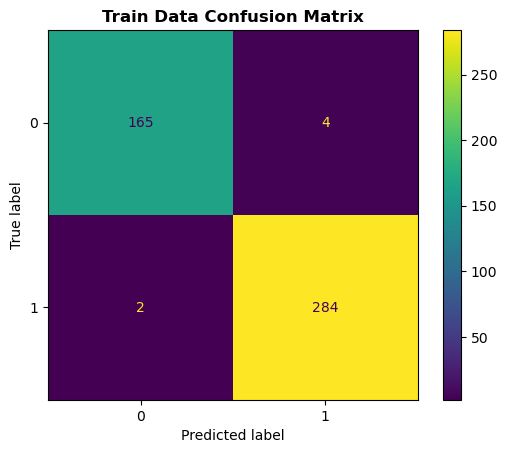

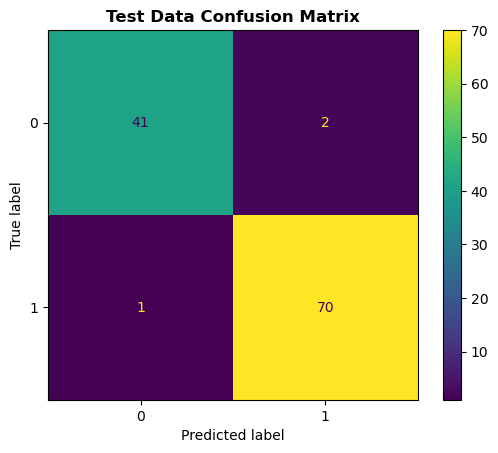

In [150]:
# plots for the confusion matrix
#Train data
trn_dsp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred))
trn_dsp.plot()
plt.title('Train Data Confusion Matrix', weight = 'bold')

#Test data
tst_dsp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
tst_dsp.plot()
plt.title('Test Data Confusion Matrix', weight = 'bold')
plt.show()